<a href="https://colab.research.google.com/github/eXIA008/tubes-dka/blob/main/heart_disease_with_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libary

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
Dataset yang digunakan adalah dataset Heart Disease yang merupakan kumpulan data historis mengenai keberadaan penyakit jantung pada pasien. Terdiri dari empat basis data: Cleveland, Hungaria, Swiss, dan Long Beach V.

In [56]:
url_dataset = 'https://raw.githubusercontent.com/eXIA008/tubes-dka/main/dataset/dataset_heart_disease.csv'
ds = pd.read_csv(url_dataset)

print(f"Jumlah data atau nilai yang missing: \n{ds.isnull().sum()}")
ds.head(20)

Jumlah data atau nilai yang missing: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Melihat deskripsi dan informasi dataset

In [57]:
print(ds.info())
ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Menghapus kolom yang tidak diperlukan
Pada dataset ini terdapat 14 kolom, namun kolom yang digunakan untuk mengevaluasi kinerja fuzzy hanya 3 kolom saja yaitu, kolom age, trestbps, dan chol saja.

In [58]:
ds.columns = [col.split(' ', 1)[-1] for col in ds.columns]

ds = ds.drop(columns=['sex', 'cp','fbs','restecg','thal','exang','slope'])

ds.tail(10)

,age,trestbps,chol,thalach,oldpeak,ca,target
1015,58,128,216,131,2.2,3,0
1016,65,138,282,174,1.4,1,0
1017,53,123,282,95,2.0,2,0
1018,41,110,172,158,0.0,0,0
1019,47,112,204,143,0.1,0,1
1020,59,140,221,164,0.0,0,1
1021,60,125,258,141,2.8,1,0
1022,47,110,275,118,1.0,1,0
1023,50,110,254,159,0.0,0,1
1024,54,120,188,113,1.4,1,0


# Penghapusan Duplicate


In [59]:
ds.isna().sum()
ds = ds.drop_duplicates()
ds.tail(10)

,age,trestbps,chol,thalach,oldpeak,ca,target
691,55,135,250,161,1.4,0,1
694,39,118,219,140,1.2,0,0
708,60,120,178,96,0.0,0,1
719,52,108,233,147,0.1,3,1
720,64,140,335,158,0.0,0,0
723,68,120,211,115,1.5,0,1
733,44,108,141,175,0.6,0,1
739,52,128,255,161,0.0,1,0
843,59,160,273,125,0.0,0,0
878,54,120,188,113,1.4,1,0


# Membagi kategori risiko kesehatan
Membagi Kategori Risiko Kesehatan berdasarkan Usia dan Kadar Kolesterol, hal ini dilakukan sebagai label awal berupa data linguistik dari numerik

In [60]:
ds['skor_risiko'] = 0.6 * ds['age'] + 0.4 * ds['chol']

ds['kategori_risiko'] = pd.qcut(ds['skor_risiko'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

print(ds['kategori_risiko'].value_counts())
ds.head(10)

kategori_risiko
Rendah    101
Sedang    101
Tinggi    100
Name: count, dtype: int64


,age,trestbps,chol,thalach,oldpeak,ca,target,skor_risiko,kategori_risiko
0,52,125,212,168,1.0,2,0,116.0,Rendah
1,53,140,203,155,3.1,0,0,113.0,Rendah
2,70,145,174,125,2.6,0,0,111.6,Rendah
3,61,148,203,161,0.0,1,0,117.8,Rendah
4,62,138,294,106,1.9,3,0,154.8,Tinggi
5,58,100,248,122,1.0,0,1,134.0,Sedang
6,58,114,318,140,4.4,3,0,162.0,Tinggi
7,55,160,289,145,0.8,1,0,148.6,Tinggi
8,46,120,249,144,0.8,0,0,127.2,Sedang
9,54,122,286,116,3.2,2,0,146.8,Tinggi


# Persebaran Data

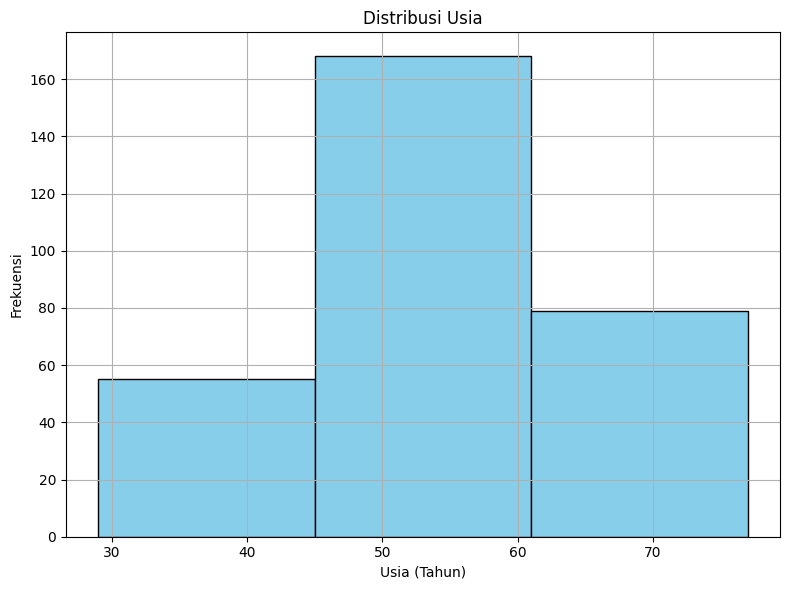

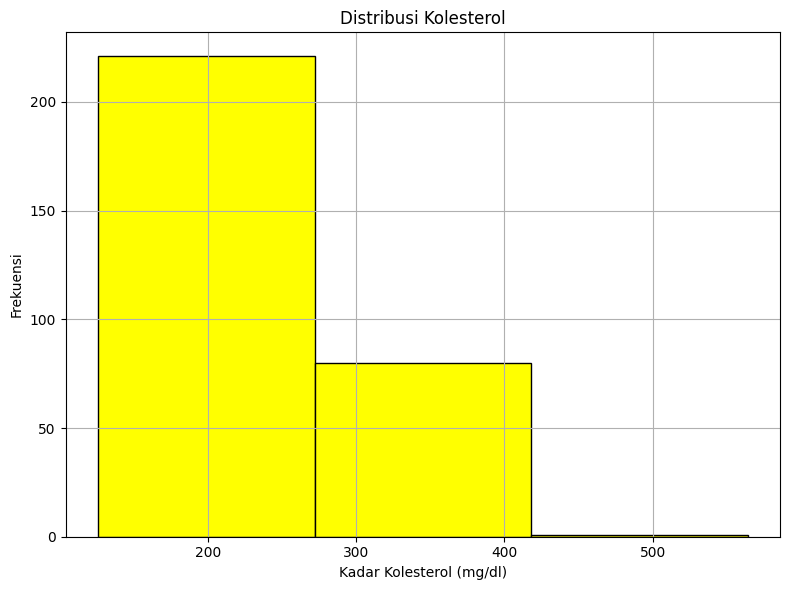

In [61]:
# Distribusi untuk age
fig_age = plt.figure(figsize=(8, 6))
plt.hist(ds['age'], bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia')
plt.grid(True)
plt.tight_layout()
plt.show()

print()
# Distribusi untuk chol
fig_chol = plt.figure(figsize=(8, 6))
plt.hist(ds['chol'], bins=3, color='yellow', edgecolor='black')
plt.xlabel('Kadar Kolesterol (mg/dl)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Kolesterol')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fuzzy Logic

## a. Fuzzyfication
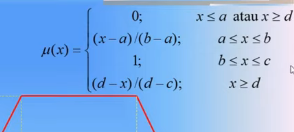

In [27]:
# Fungsi Keanggotaan untuk age

def age_muda(usia):
    if usia <= 30:
        return 1
    elif usia <= 45:
        return (45 - usia) / (45 - 30)
    else:
        return 0

def age_sedang(usia):
    if usia <= 40 or usia >= 60:
        return 0
    elif 40 < usia <= 50:
        return (usia - 40) / (50 - 40)
    elif 50 < usia < 60:
        return (60 - usia) / (60 - 50)
    else:
        return 0

def age_tua(usia):
    if usia <= 60:
        return 0
    elif 60 < usia <= 70:
        return (usia - 60) / (70 - 60)
    else:
        return 1

# Fungsi Keanggotaan untuk chol
def cholesterol_normal(chol):
  if chol <= 130 :



SyntaxError: incomplete input (<ipython-input-27-fb33045f7fd0>, line 4)